<a href="https://colab.research.google.com/github/bitanb1999/NLP_Univ_Project/blob/main/Abstractive_Summarisation_with_GRU_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Summarisation with GRU-based Model:** <br>
### **What is GRU?**
 The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the update gate instead of the input, output and forget gate of the LSTM.

The reset gate determines how to combine the new input with the previous memory, and the update gate defines how much of the previous memory to keep around. If we set the reset to all 1’s and update gate to all 0’s we again arrive at our plain RNN model. GRUs train faster and perform better than LSTMs on less training data.Both GRU & LSTM solves the problem of vanishing gradients that normal RNN unit suffers from , they do it by implementing a memory cell within their network , this enables them to store data from early within the sequence to be used later within the sequence.






### Abstractive Summarisation:

Abstractive text summarization is a technique in which the summary is generated by generating novel sentences by either rephrasing or using the new words, instead of simply extracting the important sentences. For example, some questions in the reading comprehension might not be straightforward. In such cases we do rephrasing or use new words to answer such questions.

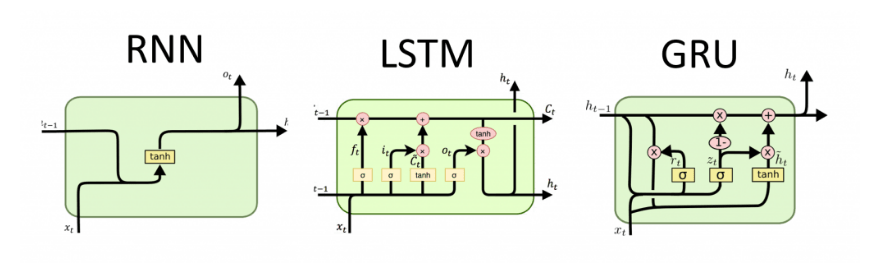

### Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/AI3_project/df_all.csv")[:4001]
df.head()

,Unnamed: 0,headline,title,text
0,0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
df=df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
#clean data using helper code
import re
def transform(summary):
    # Lower case
    summary = summary.lower()
    summary=summary.replace('\n',' ')
    # Remove HTML
    summary = re.sub('<br /><br />', ' ', summary)
    
    # Replace all non-alphanumeric characters with spaces
    summary = re.sub(r'[^a-zA-Z0-9\s]', '', summary)
    
    return summary

In [ ]:
df['headline']=df['headline'].apply(lambda x:transform(str(x)))
df['text']=df['text'].apply(lambda x:transform(str(x)))
df['title']=df['title'].apply(lambda x:transform(str(x)))

In [ ]:
#checking out the cleaned data
df.head()

,headline,title,text
0,keep related supplies in the same area make a...,how to be an organized artist1,if youre a photographer keep all the necessar...
1,create a sketch in the neopoprealist manner o...,how to create a neopoprealist art work,see the image for how this drawing develops s...
2,get a bachelors degree enroll in a studiobase...,how to be a visual effects artist1,it is possible to become a vfx artist without...
3,start with some experience or interest in art...,how to become an art investor,the best art investors do their research on t...
4,keep your reference materials sketches articl...,how to be an organized artist2,as you start planning for a project or work y...


In [ ]:
#we consider only the headline and text
df=df[['headline','text']]

##### Here we are going to use the text as the input and headline as our target, i.e abstractively summarised.

In [ ]:
df['headline']=df['headline'].apply(lambda x: 'sostok '+str(x)+' eostok')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,headline,text
0,sostok keep related supplies in the same area...,if youre a photographer keep all the necessar...
1,sostok create a sketch in the neopoprealist m...,see the image for how this drawing develops s...
2,sostok get a bachelors degree enroll in a stu...,it is possible to become a vfx artist without...
3,sostok start with some experience or interest...,the best art investors do their research on t...
4,sostok keep your reference materials sketches...,as you start planning for a project or work y...


In [ ]:
df['word_count_text']=df['text'].apply(lambda x:len(str(x).split()))
for i in range(0,100,10):
    var=df['word_count_text'].values
    var=np.sort(var,axis=None)
    print("{} percentile is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is",var[-1])
    

0 percentile is 0
10 percentile is 157
20 percentile is 224
30 percentile is 280
40 percentile is 335
50 percentile is 395
60 percentile is 475
70 percentile is 600
80 percentile is 818
90 percentile is 1218
100 percentile value is 4219


In [ ]:
for i in range(60,70):
    var=df['word_count_text'].values
    var=np.sort(var,axis=None)
    print("{} percentile is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is",var[-1])

60 percentile is 475
61 percentile is 485
62 percentile is 496
63 percentile is 509
64 percentile is 520
65 percentile is 537
66 percentile is 549
67 percentile is 560
68 percentile is 572
69 percentile is 584
100 percentile value is 4219


In [ ]:
#truncating to 65th percentile
max_length=501
max_len_headlines=128

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['text'],df['headline'],test_size=0.2,random_state=1,shuffle=True)

### Tokenisation: 

In [ ]:
#tokenisation
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=517715,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=True,
)
x_tokenizer.fit_on_texts(x_tr)



In [ ]:
#Find the percentage of occurrence of rare words (say, occurring less than 5 times) in the text.
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  71.34254961487318


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = tf.keras.preprocessing.sequence.pad_sequences(x_tr_seq,  maxlen=max_length, padding='post')
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val_seq, maxlen=max_length, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 11423


In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = tf.keras.preprocessing.sequence.pad_sequences(y_tr_seq, maxlen=max_length, padding='post')
y_val = tf.keras.preprocessing.sequence.pad_sequences(y_val_seq, maxlen=max_length, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 71.49321266968326
Size of vocabulary in Y = 3088


In [ ]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [ ]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

### Modeling:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM,GRU, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

##### In the model we use a timedistributed dense layer at the decoder end.This wrapper allows us to apply a layer to every temporal slice of an input.This does two important things:

##### <li> Allows the problem to be framed and learned as it was defined, that is one input to one output, keeping the internal process for each time step separate.</li>
##### <li> Simplifies the network by requiring far fewer weights such that only one time step is processed at a time.</li>



In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_length, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder GRU 1
encoder_gru1 = GRU(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1) = encoder_gru1(enc_emb)

# Encoder GRU 2
encoder_gru2 = GRU(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2) = encoder_gru2(encoder_output1)

# Encoder GRU 3
encoder_gru3 = GRU(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h) = encoder_gru3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder GRU
decoder_gru = GRU(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state) = decoder_gru(dec_emb, initial_state=[state_h])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 501)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 501, 200)     2284600     ['input_1[0][0]']                
                                                                                                  
 gru (GRU)                      [(None, 501, 300),   451800      ['embedding[0][0]']              
                                 (None, 300)]                                                     
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                           

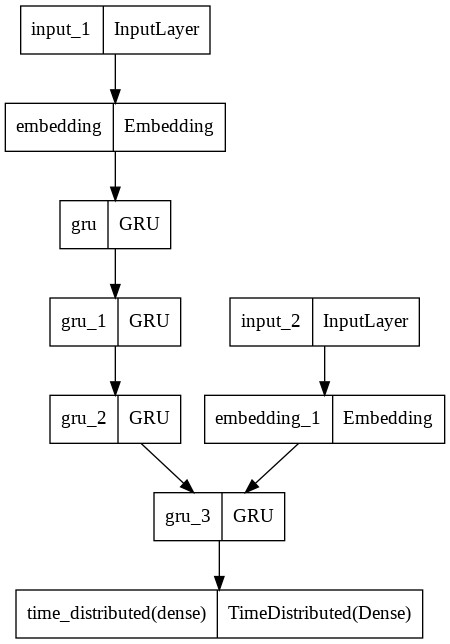

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

### Training:

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=3,
    callbacks=[es],
    batch_size=64,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/3
50/50 [==============================] - 1387s 28s/step - loss: 1.2466 - val_loss: 0.6338
Epoch 2/3
50/50 [==============================] - 1379s 28s/step - loss: 0.6408 - val_loss: 0.5589
Epoch 3/3
50/50 [==============================] - 1429s 29s/step - loss: 0.6075 - val_loss: 0.5356


In [ ]:
model.save("/content/drive/MyDrive/AI3_project/model_gru_v1_pk")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AI3_project/model_gru_v1_pk/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/AI3_project/model_gru_v1_pk/assets


In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/AI3_project/model_gru_v1_pk")

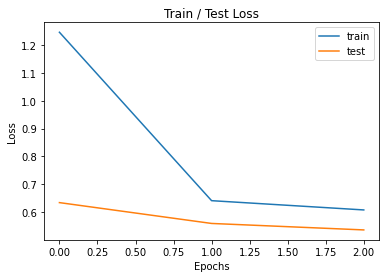

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.title("Train / Test Loss")
pyplot.show()

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index


### Inference:

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_length, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2) = decoder_gru(dec_emb2,
        initial_state=[decoder_state_input_h])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h],
                      [decoder_outputs2] + [state_h2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h) = decoder_model.predict([target_seq]
                + [e_out, e_h])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_length - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h) = (h)

    return decoded_sentence

In [ ]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

### Predictions:

In [ ]:
for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_length)))
    print ('\n')

Review: means sleepinducing for example some foods are high in the sleepinducing amino acid tryptophan like cheese chicken soy products eggs tofu fish milk turkey nuts peanuts and peanut butter pumpkin seeds and sesame seeds choose foods that have these qualities especially for dinner to activate tryptophan more efficiently favor foods that are high in complex carbohydrates but medium to low in protein carbs make tryptophan more available in the brain whereas protein has the opposite effect plan meals for sleep that load up on complex carbs and tryptophan try pasta with cheese hummus with whole wheat bread peanut butter on toast sesame seeds on salad with tuna chunks with whole wheat crackers on the side or a baked potato with cottage cheese limit the amount of food that you eat in the late afternoon and early evening as it can affect the quality of your sleep lighter meals are more likely to give you a restful night for example whereas highfat meals and large servings prolong the work

In [ ]:
def intepreting_sequence(input_seq):

    # Encode the input as state vectors.
    e_out, e_h= encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h= decoder_model.predict([target_seq] + [e_out, e_h])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_len_headlines-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h= h

    return decoded_sentence

In [ ]:
seqtxt=[]
seqsum=[]
predsum=[]
for i in range(0,3):
    print ('Review:', seq2text(x_tr[i]))
    seqtxt.append(seq2text(x_tr[i]).split(" "))
    print ('\n')
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('\n')
    seqsum.append(seq2summary(y_tr[i]).split(" "))
    predicted=intepreting_sequence(x_tr[i].reshape(1,max_length))
    print ('Predicted summary:',predicted)
    predsum.append(predicted)
    print ('\n')

Review: means sleepinducing for example some foods are high in the sleepinducing amino acid tryptophan like cheese chicken soy products eggs tofu fish milk turkey nuts peanuts and peanut butter pumpkin seeds and sesame seeds choose foods that have these qualities especially for dinner to activate tryptophan more efficiently favor foods that are high in complex carbohydrates but medium to low in protein carbs make tryptophan more available in the brain whereas protein has the opposite effect plan meals for sleep that load up on complex carbs and tryptophan try pasta with cheese hummus with whole wheat bread peanut butter on toast sesame seeds on salad with tuna chunks with whole wheat crackers on the side or a baked potato with cottage cheese limit the amount of food that you eat in the late afternoon and early evening as it can affect the quality of your sleep lighter meals are more likely to give you a restful night for example whereas highfat meals and large servings prolong the work

### Metrics:

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
scores=0
for i in range(len(predsum)):
    reference = [predsum[i].split(" ")]
    candidate = seqsum[i]
    scores+= sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(scores/i)

0.10178710178710178


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

In [ ]:
!pip install rouge-score
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=cf79b3946bdcd4aa6e1ba141c5fc233b150f38028d286e29d6586b0fe8268aa9
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [ ]:
scores=[]
for i in range(len(predsum)):
    reference = predsum[i]
    candidate = ' '.join(seqsum[i])
    print(scorer.score(reference,candidate)['rouge1'])
    scores.append(scorer.score(reference,candidate)['rouge1'])
#print(scores/i)

Score(precision=0.0, recall=0.0, fmeasure=0.0)
Score(precision=0.04291845493562232, recall=0.7142857142857143, fmeasure=0.08097165991902834)
Score(precision=0.11538461538461539, recall=0.21428571428571427, fmeasure=0.15)


In [ ]:
np.mean([i[2] for i in scores])

0.07699055330634279